## Train Deep Learning Model

### Loading the preprocessed Data

In [1]:
import os
import numpy as np
import cv2
import gc

In [2]:
# load the preprocessed data
data = np.load('./data/data_preprocess.npz')

In [3]:
X = data['arr_0']
y = data['arr_1']

In [4]:
X.shape, y.shape

((9959, 100, 100, 3), (9959,))

### Preprocessing "y"

In [5]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

We cannot feed the same data to our model, we need to pre-process it. We will use One-Hot encoding format here

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))

In [8]:
y_array = y_onehot.toarray()

### Split the Data into Train and Test sets

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y_array,test_size=0.2,random_state=42)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7967, 100, 100, 3), (1992, 100, 100, 3), (7967, 4), (1992, 4))

### Deep Learning Model

![cnn](cnn.png)

In [11]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [12]:
cv2.imshow('a',x_train[-2])
cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [14]:
# convolution neural network

model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='sigmoid')
])


# compiling CNN
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [16]:
# Training CNN
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=20)

Epoch 1/20
266/266 [==============================] - 48s 178ms/step - loss: 0.2221 - accuracy: 0.9219 - val_loss: 0.1336 - val_accuracy: 0.9644
Epoch 2/20
266/266 [==============================] - 48s 179ms/step - loss: 0.0691 - accuracy: 0.9769 - val_loss: 0.0779 - val_accuracy: 0.9744
Epoch 3/20
266/266 [==============================] - 47s 175ms/step - loss: 0.0486 - accuracy: 0.9829 - val_loss: 0.0559 - val_accuracy: 0.9794
Epoch 4/20
266/266 [==============================] - 46s 171ms/step - loss: 0.0328 - accuracy: 0.9882 - val_loss: 0.0614 - val_accuracy: 0.9819
Epoch 5/20
266/266 [==============================] - 46s 174ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0382 - val_accuracy: 0.9890
Epoch 6/20
266/266 [==============================] - 49s 183ms/step - loss: 0.0167 - accuracy: 0.9938 - val_loss: 0.0439 - val_accuracy: 0.9885
Epoch 7/20
266/266 [==============================] - 47s 175ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.0771 - val_ac

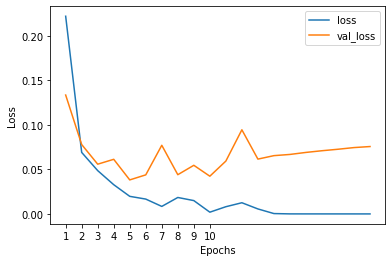

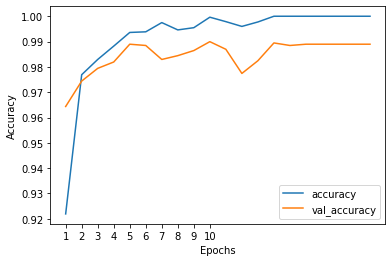

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

history_df

history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()



In [22]:
# Save CNN Model
model.save('face_cnn_model')



INFO:tensorflow:Assets written to: face_cnn_model\assets


In [23]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
history_df = pd.DataFrame(history.history)

In [26]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.222074,0.921928,0.133552,0.964357
1,0.069098,0.976905,0.077943,0.974398
2,0.048641,0.982930,0.055884,0.979418
3,0.032843,0.988201,0.061356,0.981928
4,0.019752,0.993599,0.038214,0.988956
5,0.016673,0.993850,0.043884,0.988454
6,0.008435,0.997490,0.077116,0.982932
7,0.018477,0.994603,0.044072,0.984438
8,0.014977,0.995481,0.054618,0.986446
9,0.001959,0.999623,0.042372,0.989960


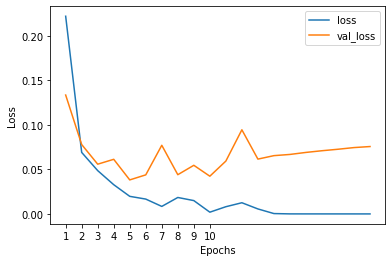

In [27]:
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

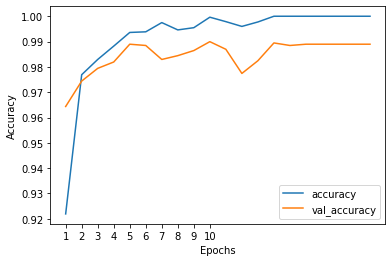

In [28]:
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

In [29]:
# Save CNN Model
model.save('face_cnn_model')

INFO:tensorflow:Assets written to: face_cnn_model\assets


In [30]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]